In [1]:
import pandas as pd
import numpy as np
import sympy as sy
from math import ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dylansdata = pd.read_csv("/3-20-10-uniform/3-20-10-uniform_stats.csv")

In [3]:
dylansdata1 = pd.read_csv("/3-20-10-uniform/3-20-10-uniform_degree.csv")

In [4]:
dylansdata2 = pd.read_csv("/3-20-10-uniform/3-20-10-uniform.csv")

In [5]:
bind = dylansdata2.join(dylansdata)

In [6]:
binomial = bind.join(dylansdata1)

In [7]:
X = np.load("/Users/urosmojsilovic/Desktop/BinomialIdeals/3-20-10-uniform/3-20-10-uniform.npy", allow_pickle = True)

In [8]:
arr = []
for i in X:
    arr.append(len(i))

In [9]:
binomial["NumGens"] = arr

In [11]:
arr2 = []
arr3 = []
arr4 = []
for i in X:
    for j in i:
        a = j[0] + j[1] + j[2] 
        b = j[3] + j[4] + j[5] 
        arr2.append(a)
        arr2.append(b)
        arr3.append(np.array(arr2))
        arr2 = []
    arr4.append(np.array(arr3))
    arr3 = []

In [12]:
arr5 = []
arr6 = []
for i in arr4:
    for j in i:
        arr5.append(j[0])
    arr6.append(np.array(arr5))
    arr5 = []

In [13]:
arr7 = []
for i in arr6:
    arr7.append(np.amin(i))
            

In [14]:
binomial["MinDeg"] = arr7

In [15]:
arr10 = []
for i in arr6:
    arr10.append(np.amax(i))
            

In [16]:
binomial["MaxDeg"] = arr10

In [17]:
arr11 = []
for i in arr6:
    arr11.append(np.mean(i))

In [18]:
binomial["MeanDeg"] = arr11

In [19]:
dylansdata = binomial

In [20]:
dylansdata['PurePowers'] = np.sum(np.sum(X[:, :, :3] > 0, axis=2) == 1, axis=1)

In [21]:
dylansdata.to_csv("1binomial-3-20-10-uniform-better.csv")

In [22]:
dylansdata.head()

,Ideal,GroebnerBasis,SizeGroebnerBasis,MaxDegreeGroebnerBasis,Degree,Dimension,Regularity,ZeroReductions,NonzeroReductions,PolynomialAdditions,NumGens,MinDeg,MaxDeg,MeanDeg,PurePowers
0,a^7*b^7*c^5-2270*a^9*b^9|a^7*b^6*c^7+6218*a^17...,a*b^10+3583*b^9*c|a^5*c^9-6955*b^10*c^2|b^9*c^...,21,21,26,1,25,67,35,309,10,11,20,17.5,0
1,a^9*b^2*c^7+11695*a^9*b^2*c^3|a*b^7*c^7+1028*a...,a^7|a^4*b^4|a*b^4*c^4|a*b*c^8+8218*a^4*b|a^5*b...,8,20,1,2,23,44,25,141,10,10,20,16.2,0
2,a*b^13*c^3+7306*a^3*b^7*c^4|b^12*c^3-5194*a^2*...,b*c^2|a^4*c^7|a^5*c^6|a^9*b^6+13666*a^4*c^5|a^...,5,16,33,1,20,48,41,189,10,15,20,17.8,0
3,a^11*b^3*c^5+3522*a^2*b^6*c^5|a^7*b^3*c^8-7936...,a^5*c^4|a^8*b^2|a^4*c^7|b^4*c^8+882*a^4*c^4|a^...,10,17,26,1,22,49,41,194,10,12,20,17.4,0
4,b^11*c+1328*b^11|a*b^3*c^11+14896*b^4|a^9*b^8*...,a^2*c^2|b^5|a*b^4|a*b^3*c^11+14896*b^4|a^17*b,5,18,10,1,21,26,14,101,10,12,20,17.4,0


In [23]:
corr = dylansdata.corr()
#corr() is the pearson correlation coeefficient

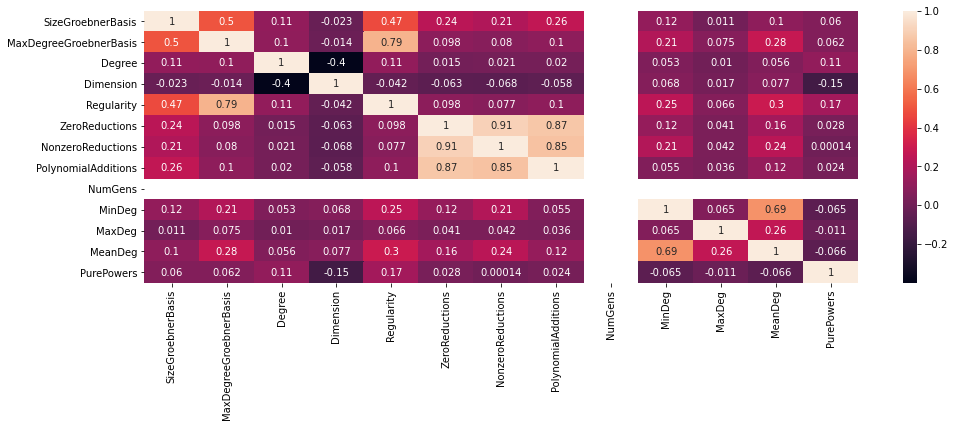

In [24]:
plt.figure(figsize=(16,5))
sb.heatmap(corr, annot = True)

In [25]:
dylansdata.describe() 

,SizeGroebnerBasis,MaxDegreeGroebnerBasis,Degree,Dimension,Regularity,ZeroReductions,NonzeroReductions,PolynomialAdditions,NumGens,MinDeg,MaxDeg,MeanDeg,PurePowers
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.634297,18.094176,24.623086,1.167927,21.888218,56.841721,39.536827,196.865623,10.0,12.296521,19.935840,17.342363,0.190208
std,4.741331,3.358588,42.737792,0.392777,4.827941,17.209615,11.665732,56.944706,0.0,2.577032,0.259036,0.854869,0.432240
min,1.000000,1.000000,1.000000,0.000000,1.000000,8.000000,2.000000,19.000000,10.0,1.000000,16.000000,12.200000,0.000000
25%,6.000000,17.000000,8.000000,1.000000,20.000000,45.000000,31.000000,158.000000,10.0,11.000000,20.000000,16.800000,0.000000
50%,9.000000,19.000000,21.000000,1.000000,22.000000,55.000000,39.000000,192.000000,10.0,13.000000,20.000000,17.400000,0.000000
75%,12.000000,20.000000,33.000000,1.000000,25.000000,67.000000,47.000000,231.000000,10.0,14.000000,20.000000,18.000000,0.000000
max,45.000000,58.000000,1859.000000,2.000000,58.000000,256.000000,149.000000,1086.000000,10.0,20.000000,20.000000,20.000000,5.000000


In [26]:
X = dylansdata["NumGens"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                      -0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                       nan
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):                nan
Time:                         23:16:28   Log-Likelihood:            -5.4610e+06
No. Observations:              1000000   AIC:                         1.092e+07
Df Residuals:                   999999   BIC:                         1.092e+07
Df Model:                            0                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NumGens       19.6866      0.006   3457.137      0.000      19.675      19.698
==============================================================================
Omnibus:                    67967.914   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104936.257
Skew:                           0.556   Prob(JB):                         0.00
Kurtosis:                       4.132   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = dylansdata["MeanDegree"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

KeyError: 'MeanDegree'

In [28]:
X = dylansdata["Degree"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     413.0
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):           8.55e-92
Time:                         23:16:43   Log-Likelihood:            -5.4608e+06
No. Observations:              1000000   AIC:                         1.092e+07
Df Residuals:                   999998   BIC:                         1.092e+07
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.1990      0.066   2986.004      0.000     196.070     196.328
Degree         0.0271      0.001     20.322      0.000       0.024       0.030
==============================================================================
Omnibus:                    68022.398   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105078.119
Skew:                           0.556   Prob(JB):                         0.00
Kurtosis:                       4.134   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X = dylansdata["MaxDeg"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1300.
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):          1.82e-284
Time:                         23:16:44   Log-Likelihood:            -5.4604e+06
No. Observations:              1000000   AIC:                         1.092e+07
Df Residuals:                   999998   BIC:                         1.092e+07
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.9588      4.380      8.895      0.000      30.374      47.544
MaxDeg         7.9208      0.220     36.054      0.000       7.490       8.351
==============================================================================
Omnibus:                    67934.070   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105006.087
Skew:                           0.555   Prob(JB):                         0.00
Kurtosis:                       4.134   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X = dylansdata["MinDeg"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     3030.
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         23:16:46   Log-Likelihood:            -5.4595e+06
No. Observations:              1000000   AIC:                         1.092e+07
Df Residuals:                   999998   BIC:                         1.092e+07
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.9313      0.277    656.318      0.000     181.388     182.475
MinDeg         1.2145      0.022     55.046      0.000       1.171       1.258
==============================================================================
Omnibus:                    70687.126   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111485.289
Skew:                           0.565   Prob(JB):                         0.00
Kurtosis:                       4.182   Cond. No.                         61.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = dylansdata["Regularity"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                 1.022e+04
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         23:16:47   Log-Likelihood:            -5.4559e+06
No. Observations:              1000000   AIC:                         1.091e+07
Df Residuals:                   999998   BIC:                         1.091e+07
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.8931      0.263    649.704      0.000     170.378     171.409
Regularity     1.1866      0.012    101.116      0.000       1.164       1.210
==============================================================================
Omnibus:                    69484.703   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108805.605
Skew:                           0.561   Prob(JB):                         0.00
Kurtosis:                       4.164   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X = dylansdata["PurePowers"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     591.7
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):          1.19e-130
Time:                         23:16:52   Log-Likelihood:            -5.4607e+06
No. Observations:              1000000   AIC:                         1.092e+07
Df Residuals:                   999998   BIC:                         1.092e+07
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.2563      0.062   3155.445      0.000     196.134     196.378
PurePowers     3.2036      0.132     24.324      0.000       2.945       3.462
==============================================================================
Omnibus:                    67928.367   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104885.218
Skew:                           0.556   Prob(JB):                         0.00
Kurtosis:                       4.132   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Multiple linear regression on the sample data, and we pull coefficients 
X = dylansdata[["MaxDeg", "MinDeg", "Degree", "Regularity", "MeanDeg", "PurePowers", "Dimension"]]
Y = dylansdata["PolynomialAdditions"]
X  = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.027
Model:                             OLS   Adj. R-squared:                  0.027
Method:                  Least Squares   F-statistic:                     3898.
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         23:17:21   Log-Likelihood:            -5.4476e+06
No. Observations:              1000000   AIC:                         1.090e+07
Df Residuals:                   999992   BIC:                         1.090e+07
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1554      4.327     10.437      0.000      36.675      53.635
MaxDeg        -0.8261      0.228     -3.624      0.000      -1.273      -0.379
MinDeg        -1.3737      0.031    -44.929      0.000      -1.434      -1.314
Degree        -0.0289      0.001    -19.974      0.000      -0.032      -0.026
Regularity     0.7950      0.012     63.599      0.000       0.770       0.819
MeanDeg       10.3766      0.097    107.135      0.000      10.187      10.566
PurePowers     1.4279      0.134     10.623      0.000       1.164       1.691
Dimension    -10.1407      0.158    -64.175      0.000     -10.450      -9.831
==============================================================================
Omnibus:                    68443.179   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108305.356
Skew:                           0.551   Prob(JB):                         0.00
Kurtosis:                       4.177   Cond. No.                     4.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.3000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.0000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 8.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0500e+02, 0.0000e+00, 0.00

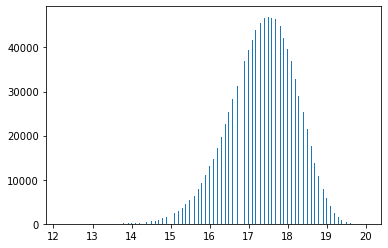

In [35]:
plt.hist(dylansdata["MeanDeg"], bins = 'auto')

(array([1.6125e+05, 0.0000e+00, 2.5213e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([1.0000e+00, 1.5000e+00, 2.0000e+00, ..., 1.8580e+03, 1.8585e+03,
        1.8590e+03]),
 <a list of 3716 Patch objects>)

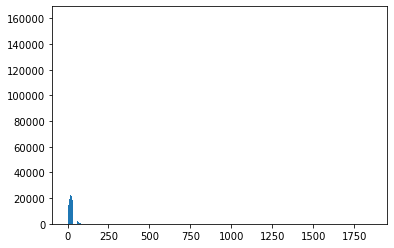

In [36]:
plt.hist(dylansdata["Degree"], bins = 'auto')

(array([2.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.22000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 9.95000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.55500e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 5.92200e+03, 0.00000e+00, 0.00

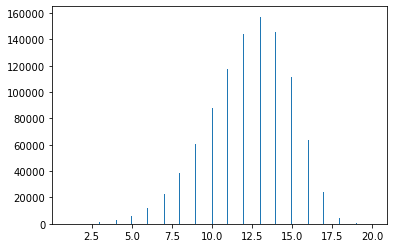

In [37]:
plt.hist(dylansdata["MinDeg"], bins = 'auto')

(array([8.25366e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.59854e+05,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.40180e+04, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 7.31000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.00000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00]),
 array([0.        , 0.23809524, 0.47619048, 0.71428571, 0.95238095,
        1.19047619, 1.42857143, 1.66666667, 1.9047619 , 2.14285714,
        2.38095238, 2.61904762, 2.85714286, 3.0952381 , 3.33333333,
        3.57142857, 3.80952381, 4.04761905, 4.28571429, 4.52380952,
        4.76190476, 5.        ]),
 <a list of 21 Patch objects>)

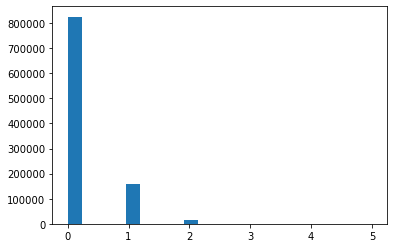

In [38]:
plt.hist(dylansdata["PurePowers"], bins = 'auto')